In [238]:
import pandas as pd

train=pd.read_csv('final_data/new_train.csv',sep=',')
test=pd.read_csv('final_data/test.csv',sep=',')
spec=pd.read_csv('final_data/spec.csv',sep=',')
birth= pd.read_csv('final_data/birth.csv',sep=',')
birth.head()

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,1,2,3,4,5,6,7,8,9,10,11,12,13
0,52640,2019/1/29 00:00,NaN,S15,NaN,NaN,2019/2/12 00:00,True,4,NaN,NaN,NaN,A
1,52641,2019/4/25 00:00,NaN,S30,NaN,NaN,2019/5/8 00:00,True,7,NaN,NaN,母,A
2,52648,2019/9/10 00:00,NaN,NaN,NaN,NaN,2019/10/8 00:00,True,6,NaN,NaN,母,A
3,52678,2019/7/30 00:00,NaN,NaN,NaN,NaN,2019/8/6 00:00,True,4,NaN,NaN,公,A
4,122630,2019/5/25 00:00,NaN,NaN,NaN,NaN,2019/6/20 00:00,True,5,1.0,NaN,NaN,B


In [239]:
new_train=pd.DataFrame(data=train,columns=['3','4','5','6','7','9','11','10','14','18','21','season','cycle','times','sub','year','cycle2','health','weight'])
new_test=pd.DataFrame(data=test,columns=['3','4','5','6','7','9','10','14','18','21','season','cycle','times','sub','year','cycle2','health','weight'])

In [240]:
new_train['11']

0        29.4
1        27.8
2         9.0
3        13.0
4        13.2
         ... 
33249    20.0
33250    21.0
33251    19.0
33252    12.0
33253    10.0
Name: 11, Length: 33254, dtype: float64

In [241]:
#train有不需要判斷的編號就去掉
for i in range(len(new_test['5'])):
    if len(new_train.index[new_train['5'] == new_test['5'][i]]) == 0:
        new_train=new_train.drop([i])
new_train.reset_index(inplace=True)
for i in range(len(new_train['11'])):
    if new_train['11'][i] == 0:
        new_train = new_train.drop([i])
new_train.reset_index(inplace=True)
new_train

,level_0,index,3,4,5,6,7,9,11,10,...,18,21,season,cycle,times,sub,year,cycle2,health,weight
0,0,0,3,A,52612,507H7173,96040545,1,29.4,78.0,...,1,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4,A,52612,507H7173,96040545,1,27.8,107.0,...,1,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,5,A,52612,507H7173,96040545,1,9.0,140.0,...,2,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,6,A,52612,507H7173,96040545,1,13.0,175.0,...,2,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,7,A,52612,507H7173,96040545,1,13.2,210.0,...,2,501H8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31736,31801,33249,1,C,93184912,14H1999,8.51715e+07,8,20.0,12.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31737,31802,33250,5,C,93184912,14H1999,8.51715e+07,8,21.0,137.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31738,31803,33251,6,C,93184912,14H1999,8.51715e+07,8,19.0,168.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31739,31804,33252,7,C,93184912,14H1999,8.51715e+07,8,12.0,197.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
new_train['6']=new_train['6'].fillna("NoData").astype("str")
new_test['6']=new_test['6'].fillna("NoData").astype("str")
new_train['7']=new_train['7'].fillna("NoData").astype("str")
new_test['7']=new_test['7'].fillna("NoData").astype("str")
new_train['21']=new_train['21'].fillna("NoData").astype("str")
new_test['21']=new_test['21'].fillna("NoData").astype("str")
avg_weight = birth['6'].mean()
birth['6'] = birth['6'].fillna(birth['6'].mean())

new_train.dropna(subset=['10','6','7'], inplace=True)

new_train['year']=train['2']
new_test['year']=test['2']

In [243]:
new_train

,level_0,index,3,4,5,6,7,9,11,10,...,18,21,season,cycle,times,sub,year,cycle2,health,weight
0,0,0,3,A,52612,507H7173,96040545,1,29.4,78.0,...,1,501H8784,NaN,NaN,NaN,NaN,2013,NaN,NaN,NaN
1,1,1,4,A,52612,507H7173,96040545,1,27.8,107.0,...,1,501H8784,NaN,NaN,NaN,NaN,2013,NaN,NaN,NaN
2,2,2,5,A,52612,507H7173,96040545,1,9.0,140.0,...,2,501H8784,NaN,NaN,NaN,NaN,2013,NaN,NaN,NaN
3,3,3,6,A,52612,507H7173,96040545,1,13.0,175.0,...,2,501H8784,NaN,NaN,NaN,NaN,2013,NaN,NaN,NaN
4,4,4,7,A,52612,507H7173,96040545,1,13.2,210.0,...,2,501H8784,NaN,NaN,NaN,NaN,2013,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31736,31801,33249,1,C,93184912,14H1999,85171537.0,8,20.0,12.0,...,0,NoData,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN
31737,31802,33250,5,C,93184912,14H1999,85171537.0,8,21.0,137.0,...,0,NoData,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN
31738,31803,33251,6,C,93184912,14H1999,85171537.0,8,19.0,168.0,...,0,NoData,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN
31739,31804,33252,7,C,93184912,14H1999,85171537.0,8,12.0,197.0,...,0,NoData,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN


In [244]:
##train對上疾病資料，當年當月有病就1，反之0
from datetime import datetime
for i in range(len(spec)):
    dd=datetime.strptime(spec['4'][i], "%Y/%m/%d %H:%M")
    if len(new_train.index[new_train['5'] == spec['1'][i]])>0:
        for j in new_train.index[new_train['5'] == spec['1'][i]]:
            if new_train['year'][j] == dd.year and new_train['3'][j] == dd.month and new_train['4'][j]==spec['7'][i]:
                new_train['health'][j] = 1
    if len(new_test.index[new_test['5'] == spec['1'][i]])>0:
        for j in new_test.index[new_test['5'] == spec['1'][i]]:
            if new_test['year'][j] == dd.year and new_test['3'][j] == dd.month and new_test['4'][j]==spec['7'][i]:
                new_test['health'][j] = 1
                
for i in range(len(birth)):
    if len(new_train.index[new_train['5'] == birth['1'][i]])>0:
        for j in new_train.index[new_train['5'] == birth['1'][i]]:
                new_train['weight'][j] = birth['6'][i]
    if len(new_test.index[new_test['5'] == birth['1'][i]])>0:
        for j in new_test.index[new_test['5'] == birth['1'][i]]:
                new_test['weight'][j] = birth['6'][i]
new_train['weight'] = new_train['weight'].fillna(avg_weight)
new_test['weight'] = new_test['weight'].fillna(avg_weight)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on 

In [245]:
new_train=new_train.fillna(0)
new_test=new_test.fillna(0)

In [246]:
new_train.reset_index(inplace=True,drop=True)

In [247]:
for i in range(len(new_train['3'])):
    if int(new_train['3'][i]) >=3 and int(new_train['3'][i])<=5:
        new_train['season'][i] = "Spring"
    elif int(new_train['3'][i]) >=6 and int(new_train['3'][i])<=8:
        new_train['season'][i] = "Summer"
    elif int(new_train['3'][i]) >=9 and int(new_train['3'][i])<=11:
        new_train['season'][i] = "Autumn"
    else:
        new_train['season'][i] = "Winter"
    if int(new_train['10'][i]) <=100:
        new_train['cycle'][i] = 0
    elif int(new_train['10'][i]) >=101 and int(new_train['10'][i]) <=200 :
        new_train['cycle'][i] = 1
    elif int(new_train['10'][i]) >=201 and int(new_train['10'][i]) <=305:
        new_train['cycle'][i] = 2
    else:
        new_train['cycle'][i] = 3
    if int(new_train['9'][i]) <=2:
        new_train['times'][i] = 0
    elif int(new_train['9'][i]) >=7:
        new_train['times'][i] = 2
    else:
        new_train['times'][i] = 1
    new_train['sub'][i]=2019-int(new_train['year'][i])
for i in range(len(new_test['3'])):
    if int(new_test['3'][i]) >=3 and int(new_test['3'][i])<=5:
        new_test['season'][i] = "Spring"
    elif int(new_test['3'][i]) >=6 and int(new_test['3'][i])<=8:
        new_test['season'][i] = "Summer"
    elif int(new_test['3'][i]) >=9 and int(new_test['3'][i])<=11:
        new_test['season'][i] = "Autumn"
    else:
        new_test['season'][i] = "Winter"
    if int(new_test['10'][i]) <=100:
        new_test['cycle'][i] = 0
    elif int(new_test['10'][i]) >=101 and int(new_test['10'][i]) <=200 :
        new_test['cycle'][i] = 1
    elif int(new_test['10'][i]) >=201 and int(new_test['10'][i]) <=305:
        new_test['cycle'][i] = 2
    else:
        new_test['cycle'][i] = 3
    if int(new_test['9'][i]) <=2:
        new_test['times'][i] = 0
    elif int(new_test['9'][i]) >=7:
        new_test['times'][i] = 2
    else:
        new_test['times'][i] = 1
    new_test['sub'][i]=2019-int(new_test['year'][i])
new_train
new_test

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This i

,3,4,5,6,7,9,10,14,18,21,season,cycle,times,sub,year,cycle2,health,weight
0,1,A,52631,501H9952,97040152,4,435.0,94,6,614HO07276,Winter,3.0,1.0,0.0,2019,0.0,0.0,568.152174
1,2,A,52640,501H9952,96040567,4,13.0,94,0,551HO00695,Winter,0.0,1.0,0.0,2019,0.0,0.0,568.152174
2,3,A,52640,501H9952,96040567,4,35.0,95,1,551HO00695,Spring,0.0,1.0,0.0,2019,0.0,0.0,568.152174
3,4,A,52640,501H9952,96040567,4,70.0,96,1,551HO00695,Spring,0.0,1.0,0.0,2019,0.0,0.0,568.152174
4,5,A,52640,501H9952,96040567,4,98.0,97,1,551HO00695,Spring,0.0,1.0,0.0,2019,0.0,1.0,568.152174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6687,10,C,99183193,1H8328,97171306,8,44.0,113,0,NoData,Autumn,0.0,2.0,0.0,2019,0.0,0.0,750.000000
6688,10,C,99183209,514H4148,95170371,6,323.0,111,4,001HO12901,Autumn,3.0,1.0,0.0,2019,0.0,0.0,568.152174
6689,11,A,98051981,29H10442,92040138,4,189.0,122,1,501HO12658,Autumn,1.0,1.0,0.0,2019,0.0,0.0,568.152174
6690,11,A,97051427,7H7173,95040473,6,71.0,138,0,NoData,Autumn,0.0,1.0,0.0,2019,0.0,0.0,568.152174


In [248]:
new_train=new_train.fillna(0)
new_test=new_test.fillna(0)

In [249]:
y=new_train['11']

In [250]:
y

0        29.4
1        27.8
2         9.0
3        13.0
4        13.2
         ... 
31735    20.0
31736    21.0
31737    19.0
31738    12.0
31739    10.0
Name: 11, Length: 31740, dtype: float64

In [251]:
new_train_backup = new_train
new_test_backup = new_test

In [275]:
#挑選靠賽要訓練的資料
new_train=pd.DataFrame(data=new_train_backup,columns=['4','5','9','10','14','18','health','season','weight','times'])
new_test=pd.DataFrame(data=new_test_backup,columns=['4','5','9','10','14','18','health','season','weight','times'])

In [276]:
#把要one hot的類別轉換成數字
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
all_data=pd.concat([new_train,new_test])
#all_data['3'] = labelencoder.fit_transform(all_data['3'])
all_data['4'] = labelencoder.fit_transform(all_data['4'])
all_data['5'] = labelencoder.fit_transform(all_data['5'])
all_data['season'] = labelencoder.fit_transform(all_data['season'])
all_data['health'] = labelencoder.fit_transform(all_data['health'])
new_train = all_data[0:len(new_train)]
new_test = all_data[len(new_train)::]
all_data=pd.concat([new_train,new_test])



In [277]:
all_data

,4,5,9,10,14,18,health,season,weight,times
0,0,0,1,78.0,26,1,0,1,568.152174,0.0
1,0,0,1,107.0,27,1,0,1,568.152174,0.0
2,0,0,1,140.0,28,2,0,1,568.152174,0.0
3,0,0,1,175.0,29,2,0,2,568.152174,0.0
4,0,0,1,210.0,30,2,0,2,568.152174,0.0
...,...,...,...,...,...,...,...,...,...,...
6687,2,2029,8,44.0,113,0,0,0,750.000000,2.0
6688,2,2038,6,323.0,111,4,0,0,568.152174,1.0
6689,0,1817,4,189.0,122,1,0,0,568.152174,1.0
6690,0,1739,6,71.0,138,0,0,0,568.152174,1.0


In [278]:
#把要的類別轉換成one hot
import numpy as np
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(categorical_features =[0,1,5,6,7,9])#6
enc.fit(all_data)
X=enc.transform(new_train).toarray()
X_test=enc.transform(new_test).toarray()
X.shape


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(31740, 2074)

In [279]:
all_data


,4,5,9,10,14,18,health,season,weight,times
0,0,0,1,78.0,26,1,0,1,568.152174,0.0
1,0,0,1,107.0,27,1,0,1,568.152174,0.0
2,0,0,1,140.0,28,2,0,1,568.152174,0.0
3,0,0,1,175.0,29,2,0,2,568.152174,0.0
4,0,0,1,210.0,30,2,0,2,568.152174,0.0
...,...,...,...,...,...,...,...,...,...,...
6687,2,2029,8,44.0,113,0,0,0,750.000000,2.0
6688,2,2038,6,323.0,111,4,0,0,568.152174,1.0
6689,0,1817,4,189.0,122,1,0,0,568.152174,1.0
6690,0,1739,6,71.0,138,0,0,0,568.152174,1.0


In [280]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,78.0,26.0,568.152174
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,107.0,27.0,568.152174
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,140.0,28.0,568.152174
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,175.0,29.0,568.152174
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,210.0,30.0,568.152174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31735,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,8.0,12.0,130.0,568.152174
31736,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,8.0,137.0,134.0,568.152174
31737,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,8.0,168.0,135.0,568.152174
31738,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,8.0,197.0,136.0,568.152174


In [281]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [282]:
from keras import backend as K
def rmse(y_pred, y_true):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [283]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.optimizers import Adam

model=Sequential()
model.add(Dense(256,input_dim=2074,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss=rmse,optimizer="adam",metrics=[rmse])

In [ ]:
#model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64,epochs=10,verbose=1)
model.fit(X,y,batch_size=64,epochs=5,verbose=1)
#model.fit(new_train,y,batch_size=64,epochs=10,verbose=1)

Epoch 1/5
 2688/31740 [=>............................] - ETA: 1s - loss: 5.1802 - rmse: 5.1802

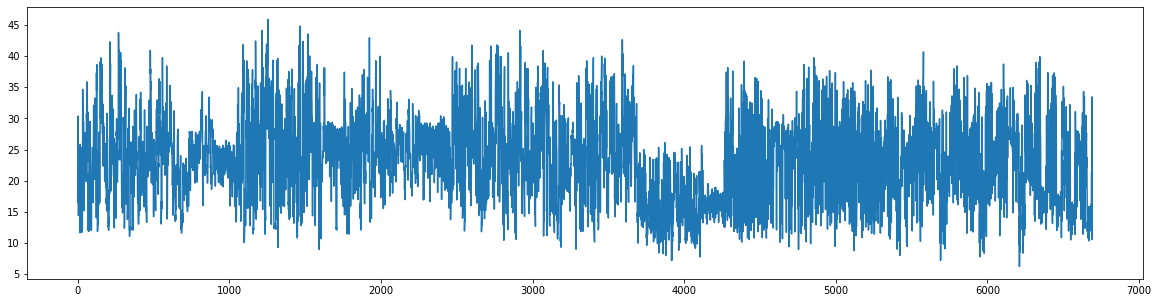

In [297]:
import matplotlib.pyplot as plt
%matplotlib inline

prediction=model.predict(X_test)
#prediction=model.predict(new_test)
plt.figure(figsize=(20,5))
plt.plot(prediction)

In [298]:
sub=pd.read_csv('final_data/submission.csv',sep=',')
sub['1']=prediction
sub.to_csv('predict_1.csv',index=False)

In [299]:
sub

,ID,1
0,480,16.608681
1,742,25.908468
2,743,27.895693
3,744,30.373318
4,745,27.252321
...,...,...
6687,39942,21.410759
6688,39943,10.561027
6689,39944,25.517174
6690,39945,33.456127
